In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt 
import seaborn as sns
from segments_insight_visualizations import *

In [2]:
# load data
data_path = "./dataset/preprocessed/CC_GENERAL_CLEAN.csv"

df=  pd.read_csv(data_path)

display(df.head())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# load model
model = joblib.load("./saved_models/hdbscan_model.pkl")
model

,min_cluster_size,50
,min_samples,20
,cluster_selection_epsilon,0.0
,cluster_selection_persistence,0.0
,max_cluster_size,0
,metric,'euclidean'
,alpha,1.0
,p,None
,algorithm,'best'
,leaf_size,40
,memory,Memory(location=None)


In [5]:
# get labels
labels = model.labels_

# cluster data
df["CLUSTER_NO"] = labels

In [14]:
# classes
print(f"Classes:")
display(df["CLUSTER_NO"].value_counts())

Classes:


CLUSTER_NO
 2    1940
 0    1765
 5    1695
 4     992
 7     925
 3     742
-1     420
 6     417
 1      53
Name: count, dtype: int64

In [20]:
class_percent = (
    df['CLUSTER_NO'].value_counts(normalize=True) * 100
).reset_index()
class_percent.columns = ['CLUSTER_NO', 'PERCENTAGE']

print(class_percent)

   CLUSTER_NO  PERCENTAGE
0           2   21.678400
1           0   19.722874
2           5   18.940664
3           4   11.085037
4           7   10.336350
5           3    8.291429
6          -1    4.693262
7           6    4.659739
8           1    0.592245


C:\Users\LAP X\AppData\Local\Temp\ipykernel_23680\1366496473.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


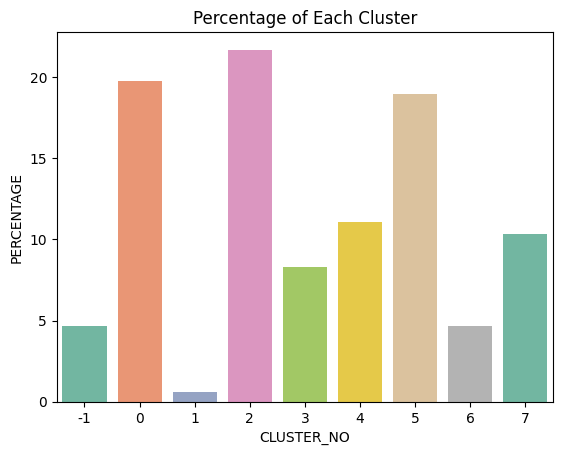

In [24]:
sns.barplot(
    data=class_percent,
    x='CLUSTER_NO',
    y='PERCENTAGE',
    palette='Set2'
)

plt.title("Percentage of Each Cluster")
plt.show()

We have around 5% outliers (cluster -1), so we will discard it for now and later we will study its characterstics.

### 1- Mean of Continous Variables within each Cluster

In [7]:
display(df.groupby("CLUSTER_NO").mean())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER_NO,,,,,,,,,,,,,,,,,
-1,956.734502,0.642093,1928.351071,1414.694143,514.594786,1309.291059,0.488345,0.279409,0.303858,0.137568,4.469048,18.221429,5110.452381,3131.875456,448.645184,0.309810,11.269048
0,401.148284,0.795132,541.377337,0.000023,542.393785,0.000000,0.706135,0.000142,0.672140,0.000000,0.000000,11.846459,3115.588319,733.808557,692.858241,0.311361,11.513314
1,229.668727,0.259539,0.000000,0.000000,0.000000,1471.333010,0.000000,0.000000,0.000000,0.144327,3.169811,0.000000,3170.754717,0.000934,1.278995,0.000000,10.000000
2,2232.246003,0.908802,0.000000,0.000000,0.000000,2013.161494,0.000000,0.000000,0.000000,0.277718,6.412887,0.000000,4053.565292,1676.514745,1017.184496,0.035258,11.364948
3,2450.638234,0.942554,579.156321,579.203113,0.000000,2046.514958,0.267134,0.267021,0.000000,0.300186,6.971698,6.063342,4625.073511,1811.657945,1052.247254,0.032796,11.359838
4,784.219113,0.792034,869.408427,869.503115,0.000000,0.000000,0.359323,0.358987,0.000000,0.000000,0.000000,7.670363,4340.081256,1187.380128,497.594713,0.136185,11.601815
5,1232.430726,0.947369,2409.928785,1462.189510,947.768183,0.000000,0.818471,0.464023,0.652175,0.000000,0.000000,34.679056,5702.968624,2233.056929,606.748982,0.253116,11.810619
6,2708.846670,0.974006,514.123933,0.000072,514.840384,2006.585610,0.661511,0.000600,0.615044,0.262772,5.772182,11.736211,4395.683453,1922.454667,1505.271357,0.025414,11.362110
7,2956.290094,0.977799,1753.339124,1013.422530,739.940616,2023.819580,0.777711,0.382032,0.633359,0.294983,7.578378,29.522162,5737.039039,2745.733634,1276.014611,0.030934,11.618378


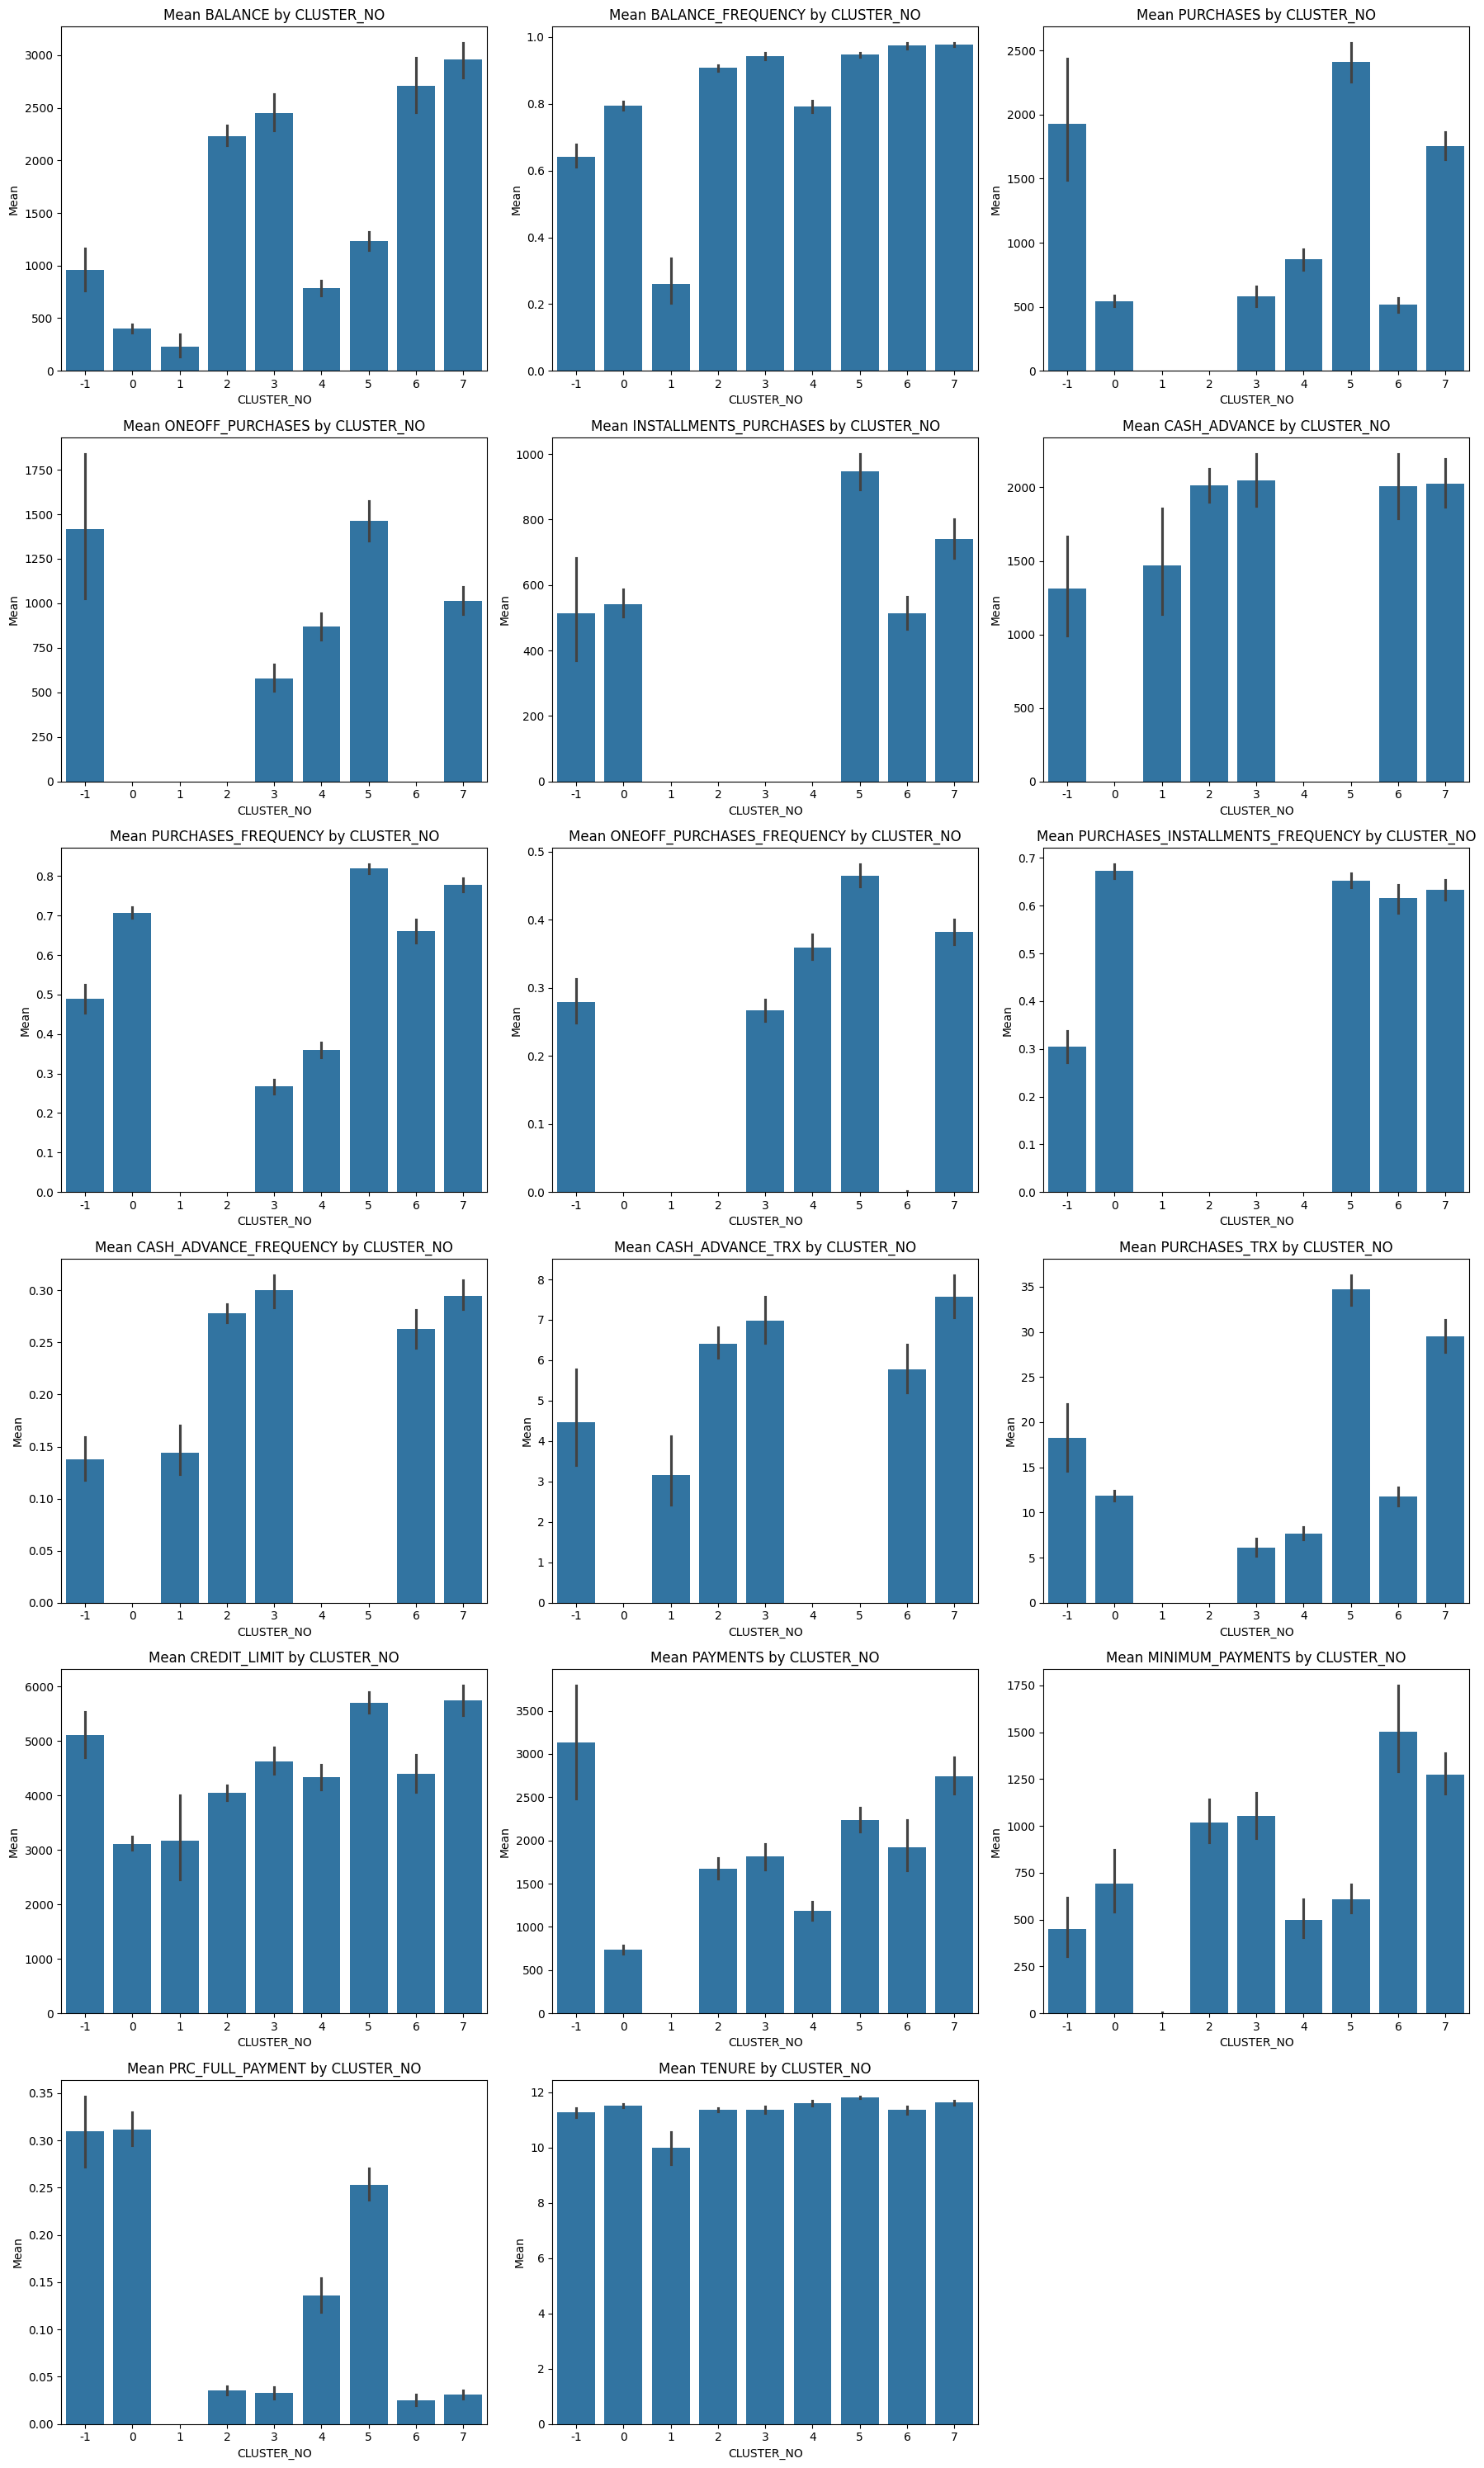

In [8]:
plot_group_feature_grid(df, "CLUSTER_NO")

Check wether there is a Segment of Customers who uses the card for money-liquidity rather than spending on their lifestyile

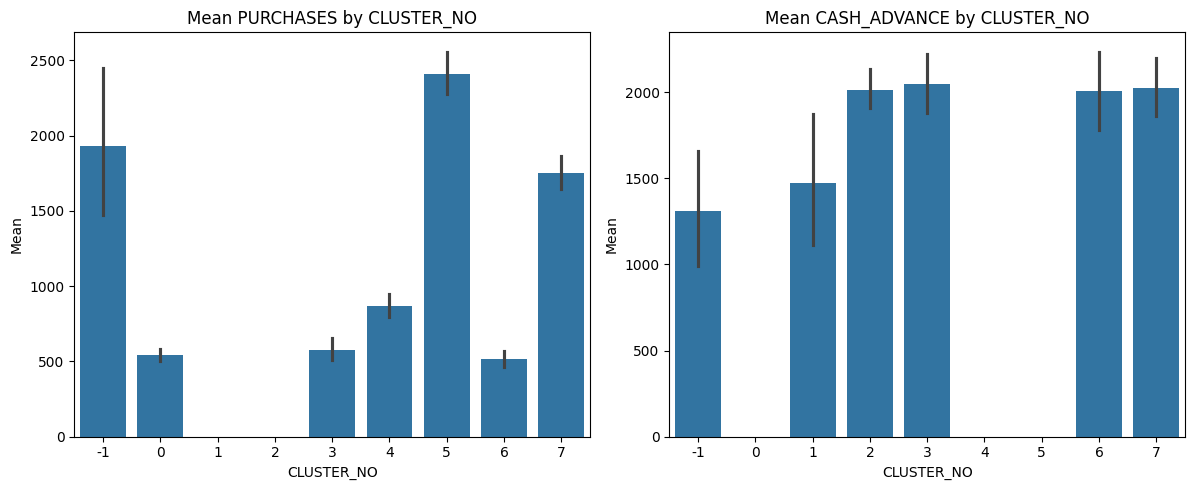

In [9]:
plot_group_feature_grid(df, "CLUSTER_NO", features=["PURCHASES", "CASH_ADVANCE"])

**Who spends the most ?**
- *Cluster 5*: they for around 18% of our customers as they are the highest spenders (avg. 2500$) with no cash advances.
    Reasons might be one of the following: 
    
    1- They want to rack up air miles, cash rebates or merchendise with their providers.
    **They are low-risk but high-volume.**

- *Cluster 7*: (10% of our customers) They are high-velocity users where they spend heavily 
    (around 1700$) but also takes cash advances (around 2000$).

    - There might be a high-revenue segment but they monitor debt-to-income ratio.

**The Borrowers**
- *Cluster 2 and 3*: they form respectivle (21% and 8% of our customers) they purchases less (virtually zeros purchases) but they have high cash advances (above 2000$)
    Reasons: they aren't using the credit card for shopping, they use it as a high interest personal loan.

- *Cluster 0*: Low purchases and zero cash advances, might be emergency usage of credit card.
- *Cluster 6*: low purchases but high cash advances.

- *Cluster 4*: The pure transactors or should we say "Safe" segment as they use the credit card for normal purchasing (around 900$) and no cash advances.

**What is the frequency of engagement?**

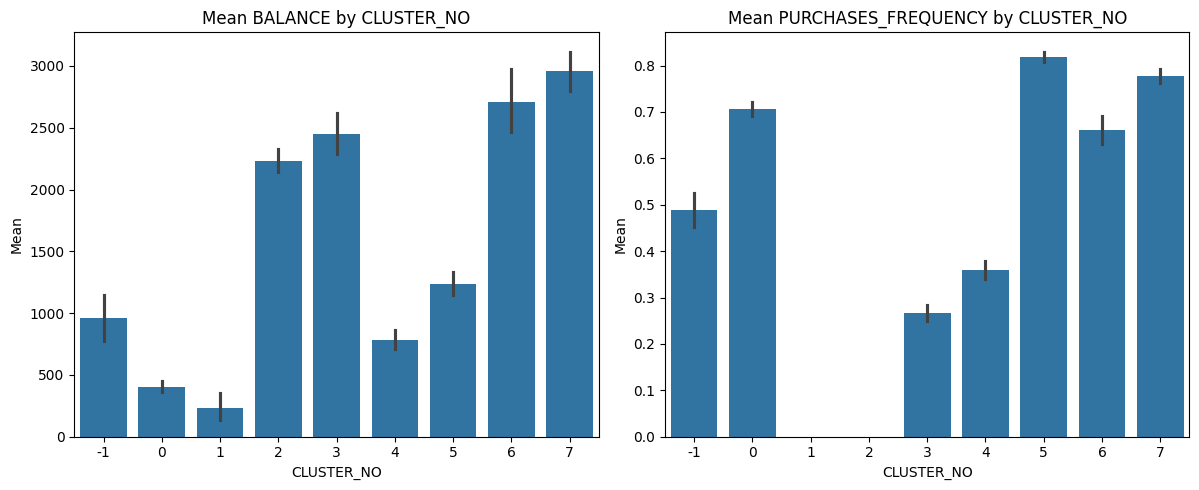

In [26]:
plot_group_feature_grid(df, "CLUSTER_NO", features=["BALANCE", "PURCHASES_FREQUENCY"])

- *(Cluster 7)*: Highest Balance, High Purchase Frequency, and high cash advance. so they are considered the **High-Value users** but the highest-risk as they use the credit card for every thing as daily life and emergency cash

- *(Cluster 5)*: The Highest Purchase Frequency (~0.8), Moderate Balance (~ 1250$) and zero cash advances. so they are considered the **Ideal Users** as they use the credit card for almost every transaction (likely because of points/cashback) but maintain a controlled balance.

- *(Cluster 0)*: with high purchase frequency and low purchases they might use the credit card for small, low value items and pay it off frequently and we can see that they have low balance (~ 400$) so they  represent high "tochpoints" but low individual profitability.

- *(Cluster 6)*: have high balance, moderate purchase frequency and high cash advances so they might be using the money to pay their depts and still using the card for necessities.

- *(cluster 2 and 3)*: they are purely in dept as they have high balance and low purchases frequency also with low purchases.

**Identifying the Customer Payment**

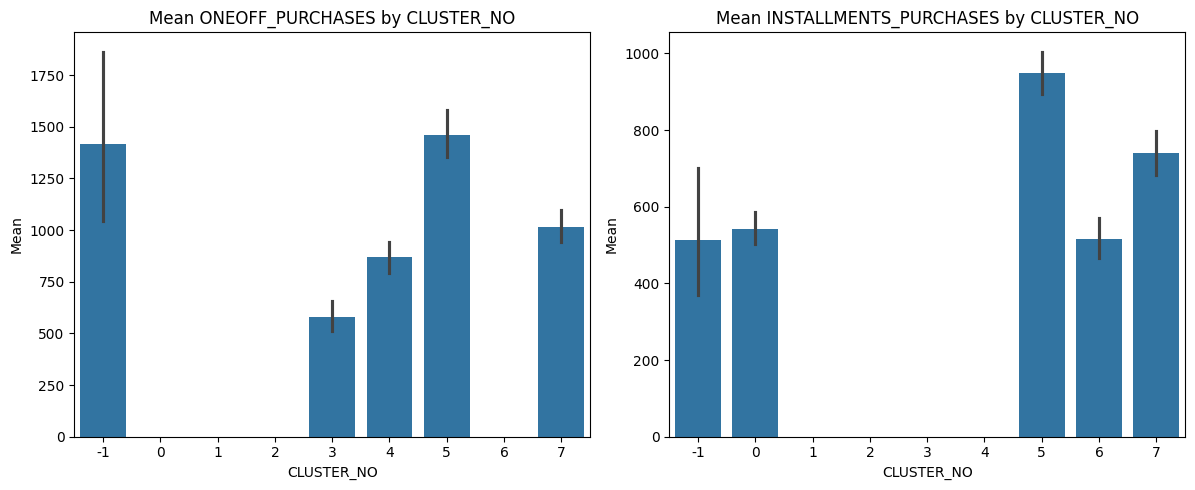

In [28]:
plot_group_feature_grid(df, "CLUSTER_NO", features=["ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES"])

- Cluster 0: they have a high purchase frequency (~0.7) but zero "One-off" purchases. Their entire spending profile (~$550) consists of installments.
they are calcukated spenders as they use their card strictly for structured purchases, while maintaining a very low balance and avoiding cash advances.

- Cluster 5: This is the "Whale" segment. as they are the highest in purchase frequency (>0.8) and the highest total purchases (~$2,400). They are the only segment that heavily utilizes both One-off purchases (~$1,450) and Installments (~$950).

- Cluster 6 and 7: are the High Credit risk Segemnt.

- Cluster 4: they have low frequency of purchases and all their purchases are "one-off" so they use the card for specific purchases rather than dailly wallt use and the avoid the high-interest cash advance trap.

**Are They Minimum Payers ?**

here we reveal the financial health and repayment discipline of each segment

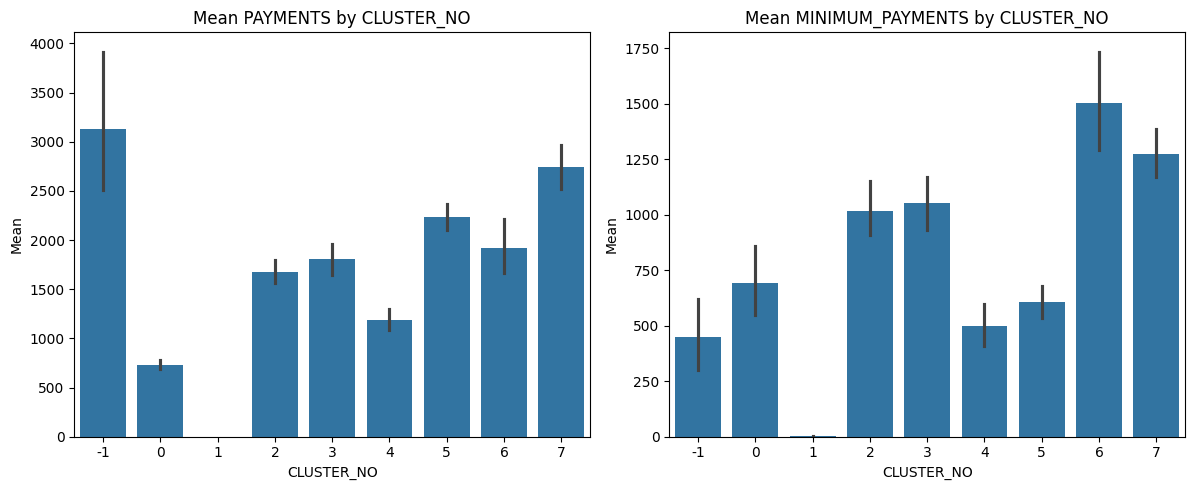

In [29]:
plot_group_feature_grid(df, "CLUSTER_NO", features=["PAYMENTS", "MINIMUM_PAYMENTS"])

- *Cluster 6*: They carry very high balances (~$2,700) and have the highest minimum payments (~$1,500). Alarmingly, they have zero one-off purchases and rely heavily on cash advances (~$2,000).

- *Cluster 7*: This group has the highest overall balance (~$3,000). While they spend heavily, their full payment percentage is nearly zero.

so both cluster 6, 7 their finantial health is critical.

- *cluster 1*: They have near-zero payments and near-zero minimum payments. These are likely "dormant" accounts or users with a zero balance who haven't used the card during this period.

- *cluster 4*: They likely pay off their small balances in full every month. so they considered as a Healthy Transactors.

- *cluster 2 and 3*: it shows they are "Balanced Debt" profile They are consistently engaged with their debt but aren't necessarily "paying ahead" of it.

# Cluster Analysis & Strategic Action Report

This report summarizes our customer segmentation analysis and outlines the recommended commercial and risk strategy for each segment. The objective is to balance revenue growth, portfolio stability, and long-term customer value.

---

## <mark>1. The "Whale" Power Users (Cluster 5)</mark>

### Overview  
This is our most valuable and strategically important segment. These customers show the highest engagement across nearly all purchasing metrics and represent a disproportionate share of transaction volume.

### Behavioral Profile
- Highest mean purchases (~2,400)
- Highest purchase frequency
- Highest installment purchase usage
- Highest average credit limits (~5,800)

They are active, sophisticated credit users who treat the card as a financial tool, not as a last-resort funding source.

### Financial Health
- Maintain relatively high balances
- Strong full payment behavior (PRC Full Payment ~0.25)
- High activity with controlled repayment behavior

### Strategic Direction
- Protect and retain at all costs.
- Introduce premium rewards, concierge services, and selective limit increases.
- Expand share-of-wallet through targeted luxury, travel, and high-value merchant partnerships.
- Offer structured installment and BNPL options for large-ticket purchases.

**Primary Objective:** Retention, wallet expansion, and long-term lifetime value maximization.

---

## <mark>2. The High-Risk "Revolvers" (Clusters 6 & 7)</mark>

### Overview  
This segment generates revenue through interest but carries elevated credit risk. These customers rely heavily on revolving balances and exhibit signs of financial stress.

### Cluster 6 Profile
- High balances (~2,700)
- Highest minimum payments (~1,500)
- Near-zero full payment rate
- Strong indication of repayment strain

### Cluster 7 Profile
- Similarly high balances
- Slightly stronger repayment behavior than Cluster 6
- High cash advance frequency, suggesting liquidity pressure

### Strategic Direction
- Suspend aggressive credit line increases.
- Avoid promotional spending incentives.
- Offer structured debt consolidation or fixed-rate installment products.
- Deploy proactive outreach from financial wellness or early collections teams.
- Implement automated reminders and hardship pathways where needed.

**Primary Objective:** Risk containment, delinquency prevention, and controlled portfolio stabilization.

---

## <mark>3. Cash-Advance Borrowers (Clusters 2 & 3)</mark>

### Overview  
These customers use the credit card primarily as a liquidity instrument rather than a purchasing tool.

### Behavioral Profile
- Highest cash advance amounts (~2,000)
- Highest cash advance frequency
- Significantly lower retail and one-off purchases

They behave more like short-term borrowers than consumers.

### Strategic Direction
- Migrate them toward structured personal loan products at lower, transparent interest rates.
- Reduce reliance on high-cost revolving cash advances.
- Introduce liquidity planning tools and short-term emergency credit alternatives.

**Primary Objective:** Transition high-cost revolving usage into safer, structured lending products with predictable repayment behavior.

---

## <mark>4. The "Disciplined Transactors" (Clusters 0 & 4)</mark>

### Overview  
This is our healthiest and lowest-risk segment. These customers use the card frequently but consistently pay off balances.

### Cluster 0 Profile
- Moderate spending
- Highest full payment rate (~0.32)
- Card used for convenience rather than financing

### Cluster 4 Profile
- Moderate one-off purchase behavior
- Low balances (~800)
- Low minimum payments
- Strong repayment discipline

### Strategic Direction
- Focus on “top-of-wallet” positioning.
- Expand cashback and merchant discount partnerships.
- Encourage recurring usage for everyday transactions.
- Provide digital budgeting and spend-tracking tools to reinforce positive behavior.

**Primary Objective:** Increase transaction volume and interchange revenue while preserving low credit risk.

---

## <mark>5. The Dormant / Inactive (Cluster 1)</mark>

### Overview  
This segment contributes minimal current revenue and shows limited engagement.

### Behavioral Profile
- Near-zero balances
- No active purchases
- Lowest tenure

These are likely newly issued but unused cards or accounts that have been passively abandoned.

### Strategic Direction
- Launch controlled reactivation campaigns (first-purchase bonuses, limited-time 0% APR).
- Conduct value perception surveys to understand disengagement drivers.
- Test small, measurable incentives before deploying large marketing budgets.

**Primary Objective:** Selective reactivation with disciplined acquisition cost control.

---

## <mark>6. The Big-Ticket Outliers (Cluster -1)</mark>

### Overview  
This segment displays high volatility with infrequent but very large transactions.

### Behavioral Profile
- High one-off purchases
- High payments
- Low purchase frequency
- Large credit exposure per transaction

These customers likely use the card for travel, luxury goods, or major planned expenditures.

### Strategic Direction
- Partner with high-end retailers and premium travel providers.
- Ensure seamless authorization for large transactions.
- Maintain strong fraud monitoring without degrading customer experience.
- Consider personalized relationship management for high-limit clients.

**Primary Objective:** Capture high-margin, large-scale transactions while tightly controlling fraud and exposure risk.

---

# Executive Summary

Our portfolio is clearly divided into:
- High-value growth drivers (Cluster 5)
- Low-risk transaction engines (Clusters 0 & 4)
- Revenue-generating but high-risk revolvers (Clusters 6 & 7)
- Liquidity-driven borrowers (Clusters 2 & 3)
- Dormant accounts with selective upside (Cluster 1)
- High-exposure outliers (Cluster -1)

The strategic focus should be:
1. Protect and expand high-value segments.
2. Monetize healthy transactors.
3. Contain and restructure high-risk revolvers.
4. Migrate cash-advance users into structured lending.
5. Reactivate dormant accounts selectively.
6. Safely facilitate high-margin outlier transactions.

This balanced approach aligns revenue expansion with disciplined risk management.

# Cluster Categories

| Cluster(s) | Label / Category |
|------------|-----------------|
| 5          | Aspiring VIP Users |
| 6, 7       | High-Risk Revolvers |
| 2, 3       | Cash Borrowers |
| 0, 4       | Disciplined Transactors |
| 1          | Dormant / Inactive |
| -1         | Outliers / Big-Ticket Buyers |

In [31]:
# mapping dictionary
cluster_mapping = {
    5: "Aspiring VIP Users",
    6: "High-Risk Revolvers",
    7: "High-Risk Revolvers",
    2: "Cash Borrowers",
    3: "Cash Borrowers",
    0: "Disciplined Transactors",
    4: "Disciplined Transactors",
    1: "Dormant / Inactive",
    -1: "Outliers / Big-Ticket Buyers"
}

# Apply mapping to create a new column
df['Cluster_Label'] = df['CLUSTER_NO'].map(cluster_mapping)

df[['CLUSTER_NO','Cluster_Label']].head()

,CLUSTER_NO,Cluster_Label
0,0,Disciplined Transactors
1,2,Cash Borrowers
2,4,Disciplined Transactors
3,-1,Outliers / Big-Ticket Buyers
4,4,Disciplined Transactors
